In [2]:
import urllib.request as req
import pandas as pd

url = "https://raw.githubusercontent.com" +\
"/kujirahand/book-mlearn-gyomu/master/src/ch2/iris"+ \
"/iris.csv"
savefile = "iris.csv"
req.urlretrieve(url, savefile)
print("保存しました")
csv = pd.read_csv(savefile, encoding="utf-8")
csv

保存しました


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu" + \
    "/ml/machine-learning-databases/wine-quality" + \
    "/winequality-white.csv"
savepath = "winequality-white.csv"
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x1dddc6b7bc8>)

In [4]:
import pandas as pd
df = pd.read_csv(savepath, sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 学習用とテスト用に分離
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.64      0.29      0.40        31
           5       0.65      0.68      0.66       298
           6       0.63      0.72      0.67       433
           7       0.61      0.49      0.55       175
           8       0.65      0.31      0.42        36
           9       0.00      0.00      0.00         1

    accuracy                           0.63       980
   macro avg       0.45      0.36      0.39       980
weighted avg       0.63      0.63      0.62       980

正解率= 0.6326530612244898


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


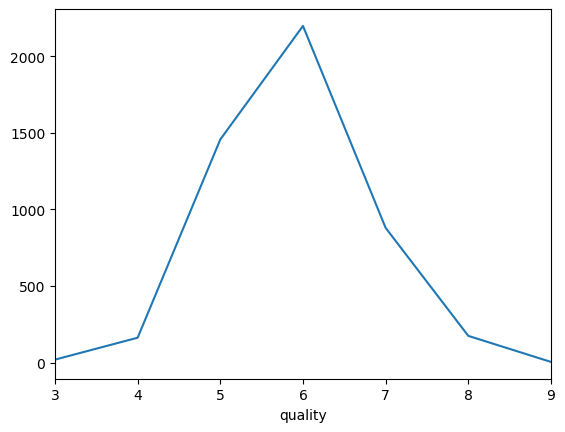

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 品質データごとにグループ分けして、その数を数える
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

#数えたデータをグラフに描画
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [8]:
#yのラベルをつける
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# yのラベルをつけ直す
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

#学習用とテスト用に分離
x_train, x_test, x_train, y_test = train_test_split(
    x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# yのラベルをつけ直す
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

#学習用とテスト用に分離
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

# 学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.31      0.42        36
           1       0.95      0.99      0.97       900
           2       1.00      0.41      0.58        44

    accuracy                           0.94       980
   macro avg       0.88      0.57      0.66       980
weighted avg       0.94      0.94      0.93       980

正解率= 0.9428571428571428


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
